# 01. Basic Graph

In [10]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import pandas as pd

## Vector

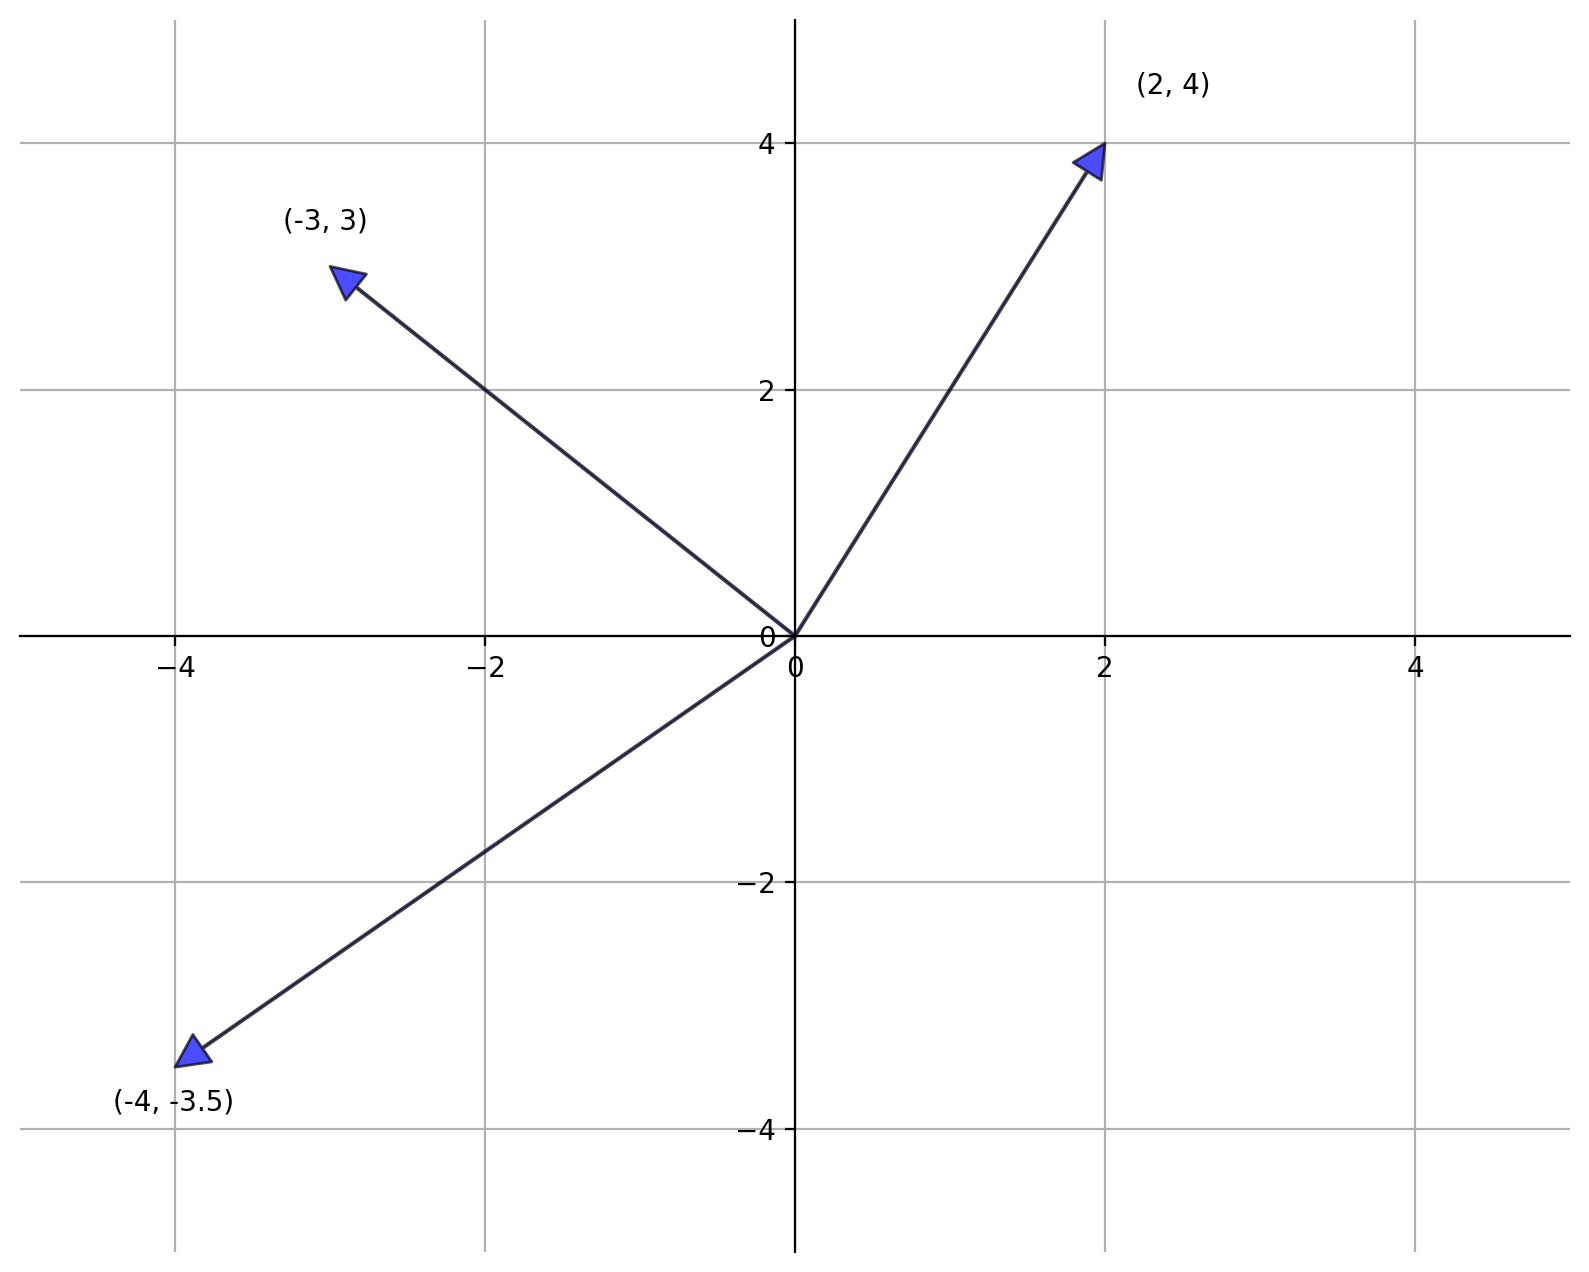

In [7]:
fig, ax = plt.subplots(figsize = (10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim = (-5, 5), ylim = (-5, 5))
ax.grid()
vecs = ((2, 4), (-3, 3), (-4, -3.5))
for v in vecs:
    ax.annotate('', xy = v, xytext = (0, 0),
                arrowprops = dict(facecolor = 'blue',
                shrink = 0,
                alpha = 0.7,
                width = 0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], str(v))
plt.show()

## セグメント比較

In [19]:
df = pd.DataFrame(
    data = {'segment': ['a', 'b', 'c', 'd'], 
            'result-value': [1.01, 1.02, 1.15, 1.05],
            'upper_95%_CI': [1.02, 1.03, 1.18, 1.14],
            'lower_95%_CI': [1.00, 1.01, 1.12, 0.96]})
df

,segment,result-value,upper_95%_CI,lower_95%_CI
0,a,1.01,1.02,1.00
1,b,1.02,1.03,1.01
2,c,1.15,1.18,1.12
3,d,1.05,1.14,0.96


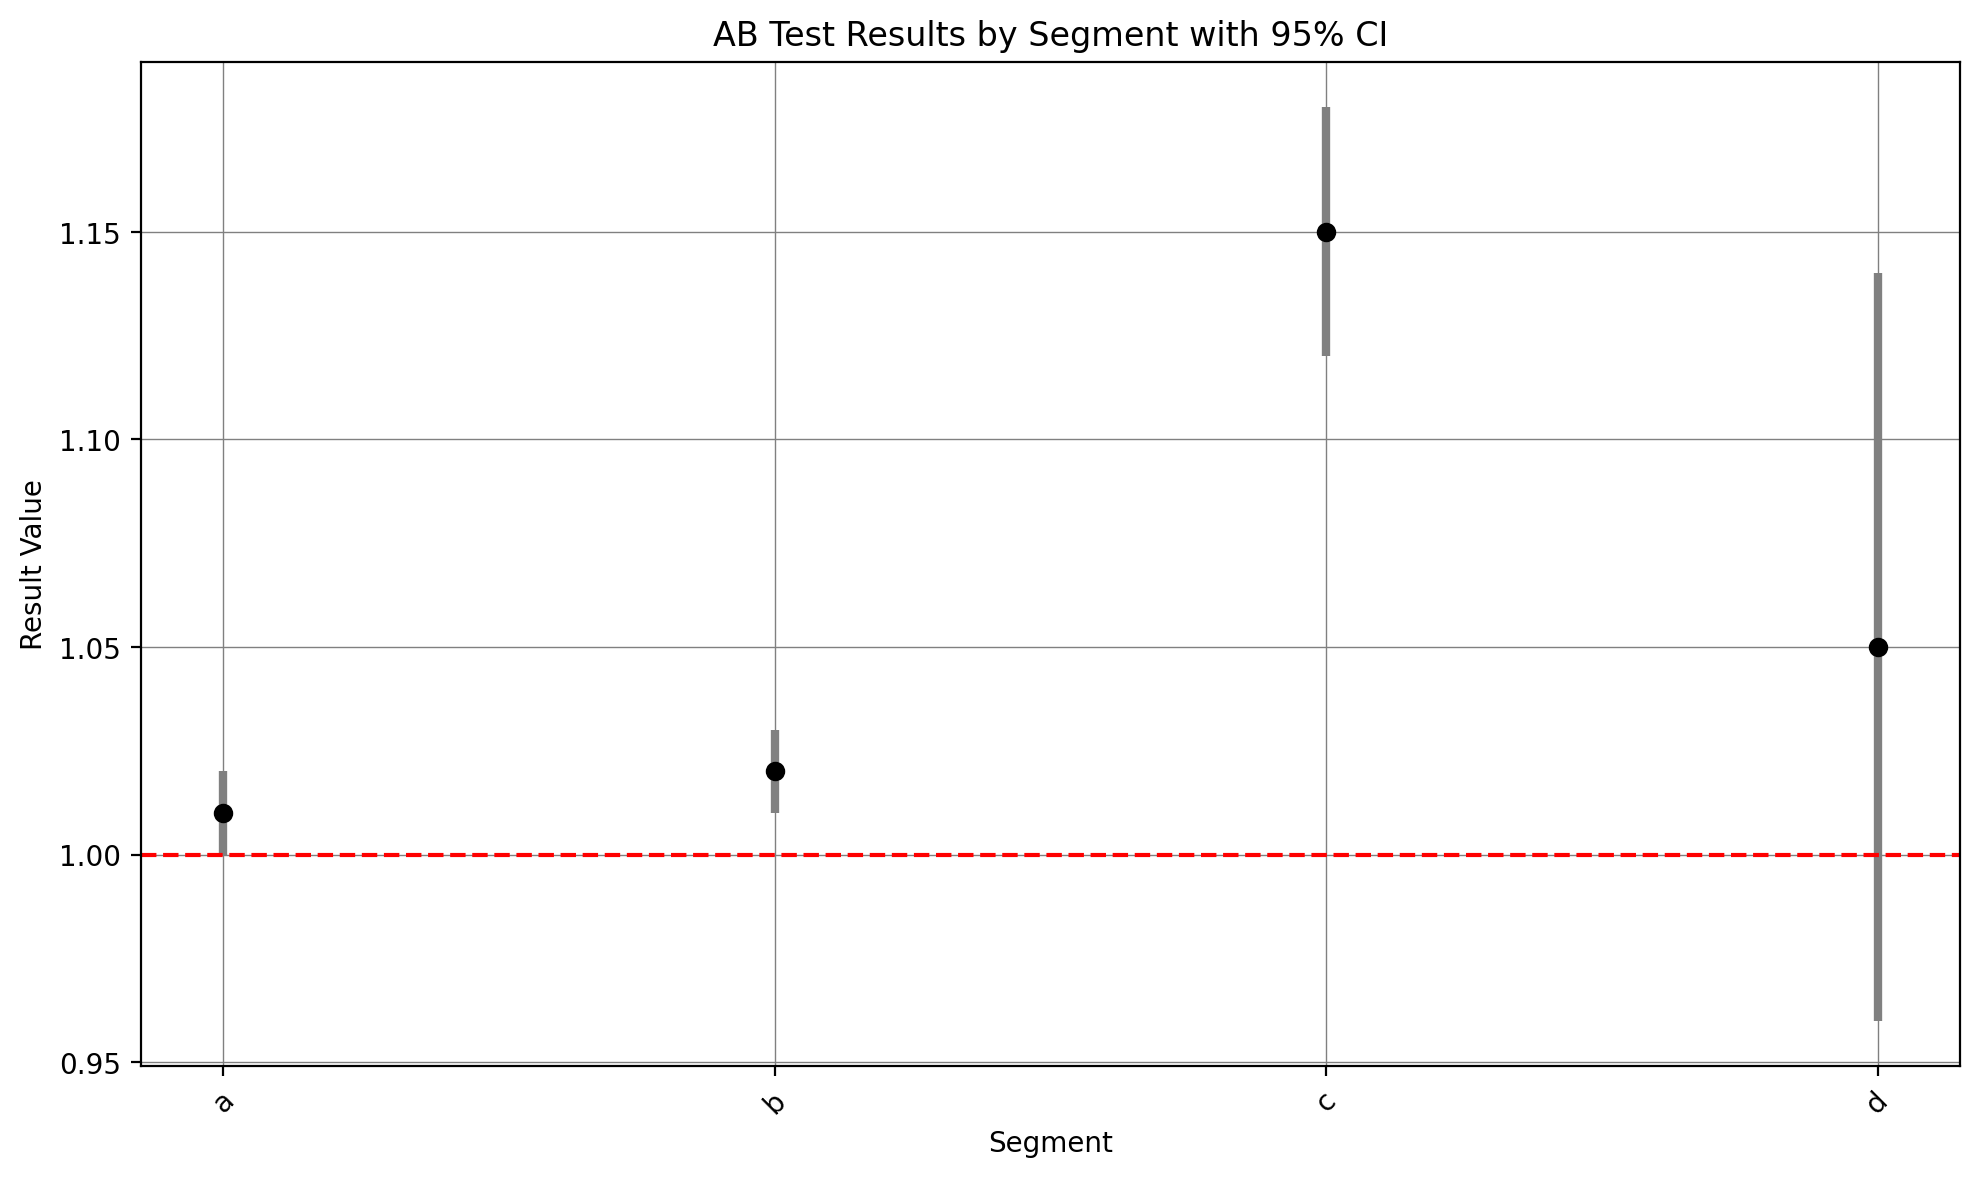

In [23]:
# 結果値と信頼区間の差を計算
df['ci_upper_diff'] = df['upper_95%_CI'] - df['result-value']
df['ci_lower_diff'] = df['result-value'] - df['lower_95%_CI']

# エラーバー（信頼区間）の長さを設定
errors = df[['ci_lower_diff', 'ci_upper_diff']].T.values

# グラフの描画
plt.figure(figsize=(10, 6))
plt.errorbar(df['segment'], df['result-value'], yerr=errors, fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=0)
plt.ylabel('Result Value')
plt.xlabel('Segment')
plt.title('AB Test Results by Segment with 95% CI')
plt.axhline(y=1.0, color='r', linestyle='--')  # 100%の位置に水平破線を追加
plt.xticks(rotation=45)  # x軸ラベルを45度回転
plt.grid(color='gray', linestyle='-', linewidth=0.5)  # グリッド線を追加
plt.tight_layout()
plt.show()
